In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [69]:
bus = pd.read_csv('CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals.csv')
train = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv')
print(f'Bus Ridership dataframe shape: {bus.shape}')
print(f'Bus Ridership dataframe columns: {bus.columns}')
print(f'Train Ridership dataframe shape: {train.shape}')
print(f'Train Ridership dataframe columns: {train.columns}')

Bus Ridership dataframe shape: (33184, 7)
Bus Ridership dataframe columns: Index(['route', 'routename', 'Month_Beginning', 'Avg_Weekday_Rides',
       'Avg_Saturday_Rides', 'Avg_Sunday-Holiday_Rides', 'MonthTotal'],
      dtype='object')
Train Ridership dataframe shape: (34475, 7)
Train Ridership dataframe columns: Index(['station_id', 'stationame', 'month_beginning', 'avg_weekday_rides',
       'avg_saturday_rides', 'avg_sunday-holiday_rides', 'monthtotal'],
      dtype='object')


In [70]:
bus.columns = bus.columns.str.lower()
bus.columns

Index(['route', 'routename', 'month_beginning', 'avg_weekday_rides',
       'avg_saturday_rides', 'avg_sunday-holiday_rides', 'monthtotal'],
      dtype='object')

In [71]:
bus.rename(columns={'route'     : 'route_id',
                    'routename' : 'route_name',
                    'monthtotal': 'month_total'}, inplace=True)
train.rename(columns={'stationame' : 'station_name',
                     'monthtotal'  : 'month_total'}, inplace=True)

In [72]:
bus.head()

,route_id,route_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total
0,1,Indiana/Hyde Park,01/01/2001,6982.6,0.0,0.0,153617
1,2,Hyde Park Express,01/01/2001,1000.0,0.0,0.0,22001
2,3,King Drive,01/01/2001,21406.5,13210.7,8725.3,567413
3,4,Cottage Grove,01/01/2001,22432.2,17994.0,10662.2,618796
4,6,Jackson Park Express,01/01/2001,18443.0,13088.2,7165.6,493926


In [73]:
train.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189


In [74]:
train.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189


In [75]:
bus.isna().sum()

route_id                    0
route_name                  0
month_beginning             0
avg_weekday_rides           0
avg_saturday_rides          0
avg_sunday-holiday_rides    0
month_total                 0
dtype: int64

In [76]:
train.isna().sum()

station_id                  0
station_name                0
month_beginning             0
avg_weekday_rides           0
avg_saturday_rides          0
avg_sunday-holiday_rides    0
month_total                 0
dtype: int64

In [77]:
bus['month_beginning'] = pd.to_datetime(bus['month_beginning'])
train['month_beginning'] = pd.to_datetime(train['month_beginning'])

In [78]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33184 entries, 0 to 33183
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   route_id                  33184 non-null  object        
 1   route_name                33184 non-null  object        
 2   month_beginning           33184 non-null  datetime64[ns]
 3   avg_weekday_rides         33184 non-null  float64       
 4   avg_saturday_rides        33184 non-null  float64       
 5   avg_sunday-holiday_rides  33184 non-null  float64       
 6   month_total               33184 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 1.8+ MB


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station_id                34475 non-null  int64         
 1   station_name              34475 non-null  object        
 2   month_beginning           34475 non-null  datetime64[ns]
 3   avg_weekday_rides         34475 non-null  float64       
 4   avg_saturday_rides        34475 non-null  float64       
 5   avg_sunday-holiday_rides  34475 non-null  float64       
 6   month_total               34475 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.8+ MB


In [80]:
bus.to_csv('clean_bus_avg_ridership.csv', index=False)
train.to_csv('clean_train_avg_ridership.csv', index=False)

### **EDA**

In [81]:
bus['route_name'].nunique()

192

In [82]:
train['station_name'].nunique()

148

In [83]:
train.groupby('station_name')[['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides']].mean()

,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides
station_name,,,
18th,1459.538017,859.652066,626.624380
35-Bronzeville-IIT,2025.995041,1230.311570,875.473140
35th/Archer,2674.033471,1270.130165,861.809504
43rd,956.181405,534.361157,381.400413
47th-Dan Ryan,2853.844398,2022.249793,1519.847303
...,...,...,...
Western-Cermak,927.851653,504.230165,363.817769
Western-Forest Park,1373.958264,874.395868,649.431818
Western-Orange,3441.607438,1619.058264,1121.833884


In [84]:
bus.groupby('route_name')[['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides']].mean()

,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides
route_name,,,
111th/King Drive,3262.157000,1928.572000,1462.354000
16th/18th,2643.564876,1683.414876,1358.840496
31st,441.200000,0.000000,0.000000
31st/35th,4718.989109,2724.126733,2034.046535
35th,5776.268794,3360.079433,2085.128369
...,...,...,...
Westchester,503.220139,0.000000,0.000000
Western,20468.054959,17855.407438,12413.902066
Western Express,8630.285549,0.836416,2.014451


In [106]:
mean_by_trainstation = train.groupby('station_name')[['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides']].agg([np.mean])
mean_by_trainstation.columns = mean_by_trainstation.columns.map('_'.join)
top_20_train = mean_by_trainstation.sort_values(by=['avg_weekday_rides_mean', 'avg_saturday_rides_mean', 'avg_sunday-holiday_rides_mean'], ascending=False).head(20)

In [107]:
mean_by_busroute = bus.groupby('route_name')[['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides']].agg([np.mean])
mean_by_busroute.columns = mean_by_busroute.columns.map('_'.join)
top_20_bus = mean_by_busroute.sort_values(by=['avg_weekday_rides_mean', 'avg_saturday_rides_mean', 'avg_sunday-holiday_rides_mean'], ascending=False).head(20)

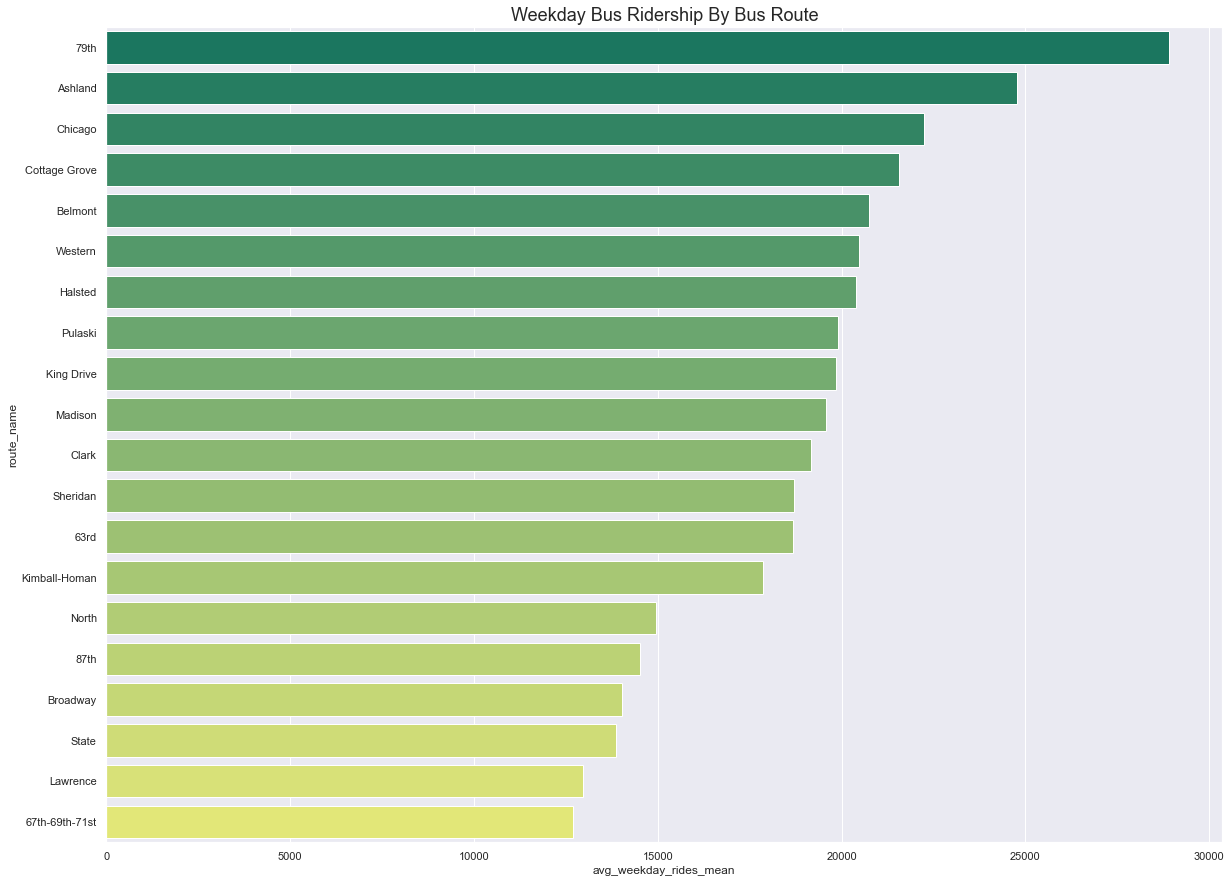

In [142]:
plt.figure(figsize=(20,15))
plt.title('Weekday Bus Ridership By Bus Route',fontsize=18)
sns.barplot(x=top_20_bus['avg_weekday_rides_mean'], y=top_20_bus.index, palette='summer');
plt.savefig('weekday_ridership_bus.png')

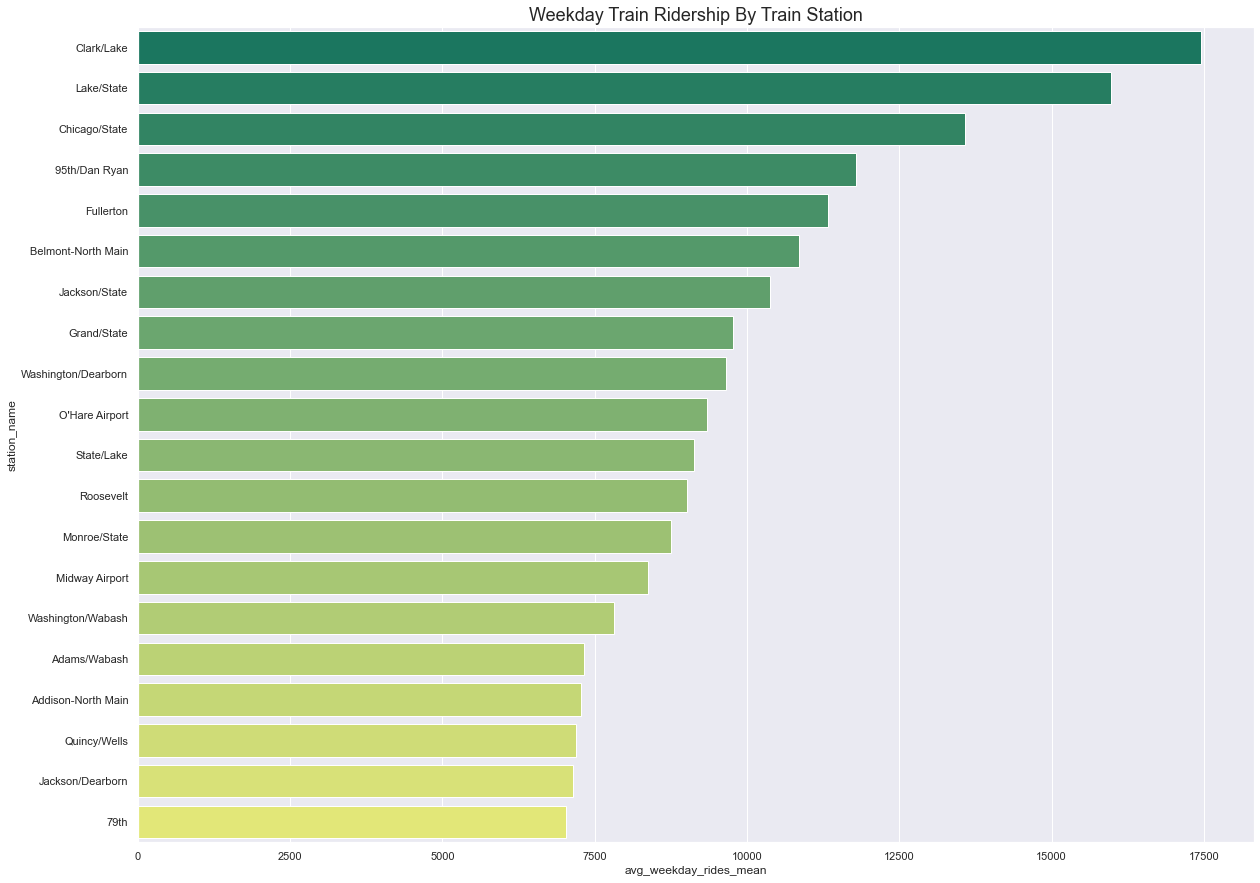

In [135]:
plt.figure(figsize=(20,15))
plt.title('Weekday Train Ridership By Train Station',fontsize=18)
sns.barplot(x=top_20_train['avg_weekday_rides_mean'], y=top_20_train.index, palette='summer');
plt.savefig('weekday_ridership_train.png')

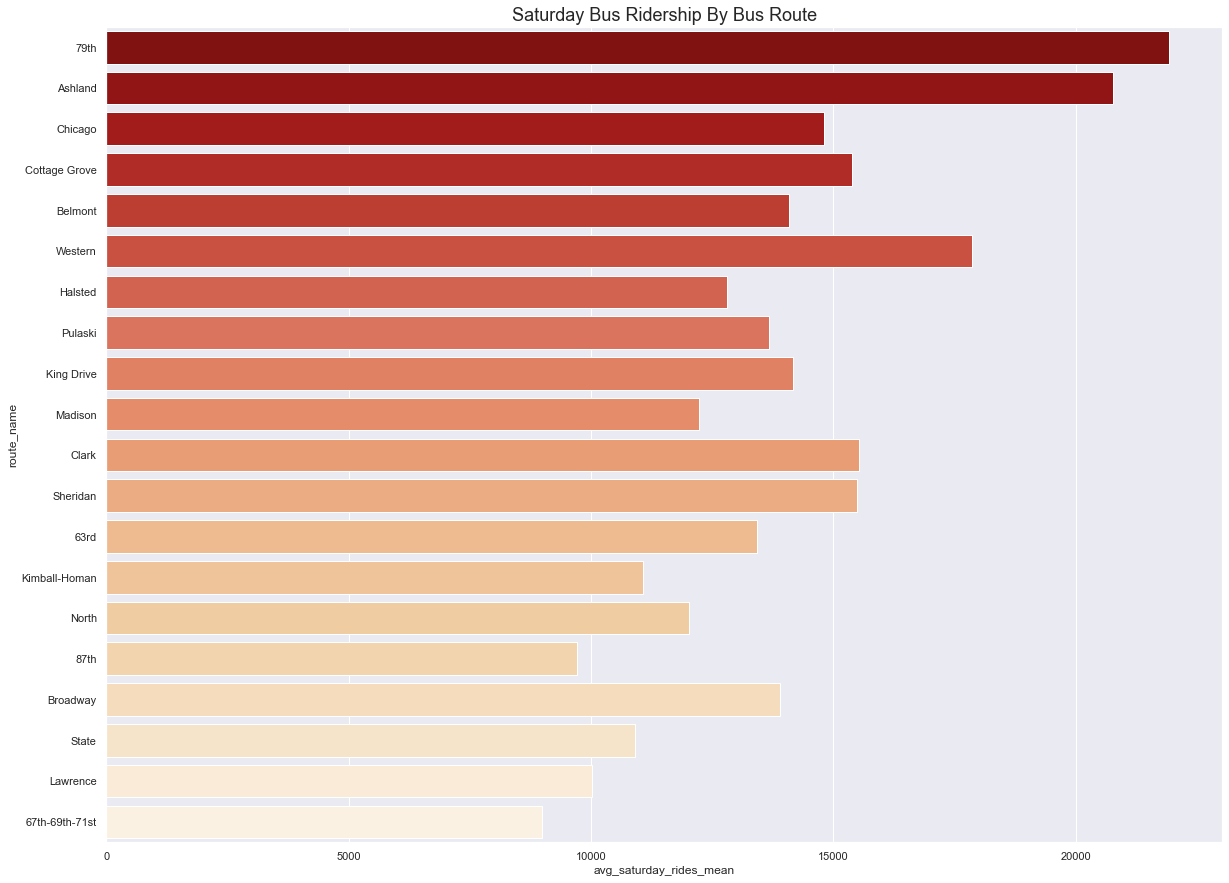

In [137]:
plt.figure(figsize=(20,15))
plt.title('Saturday Bus Ridership By Bus Route',fontsize=18)
sns.barplot(x=top_20_bus['avg_saturday_rides_mean'], y=top_20_bus.index, palette='OrRd_r');
plt.savefig('saturday_ridership_bus.png')

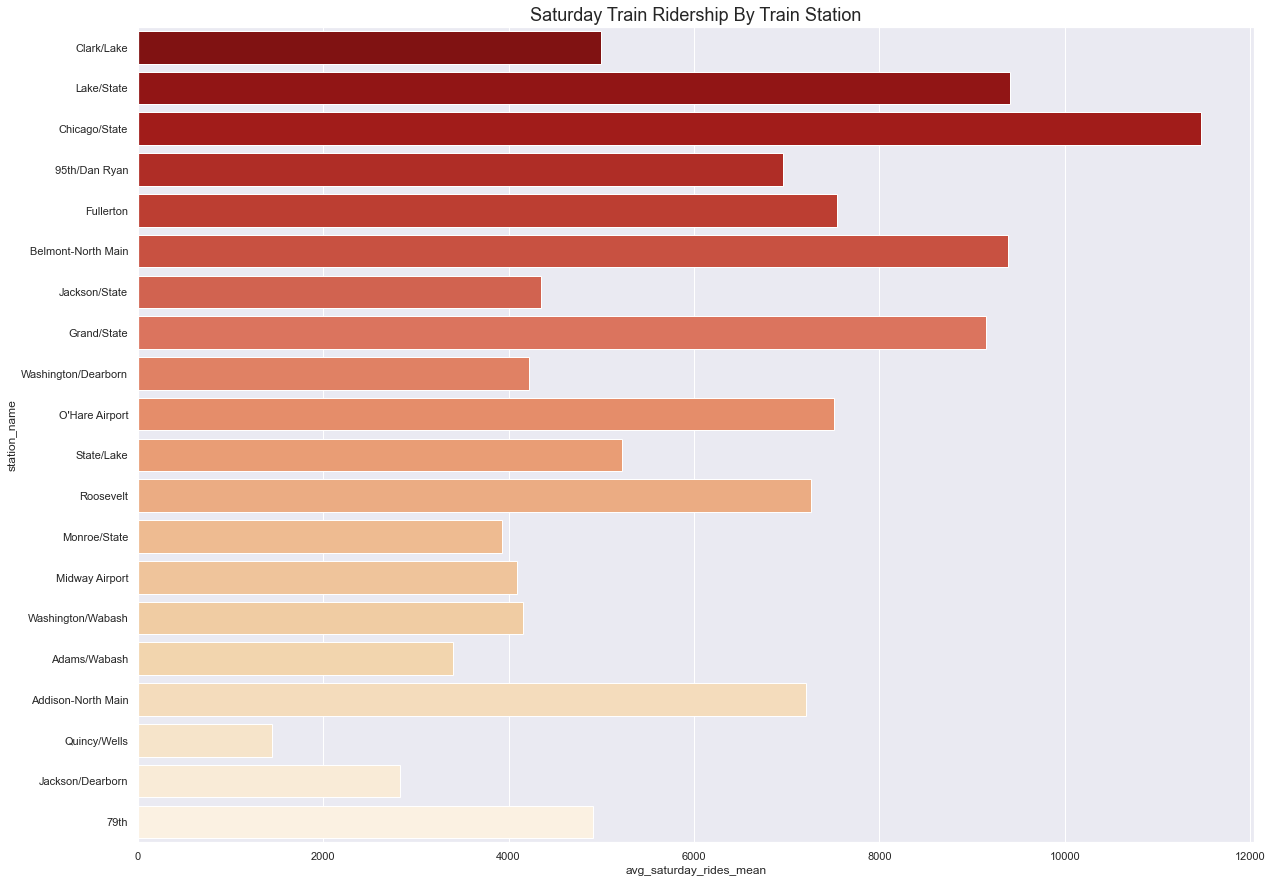

In [139]:
plt.figure(figsize=(20,15))
plt.title('Saturday Train Ridership By Train Station',fontsize=18)
sns.barplot(x=top_20_train['avg_saturday_rides_mean'], y=top_20_train.index, palette='OrRd_r');
plt.savefig('saturday_ridership_train.png')

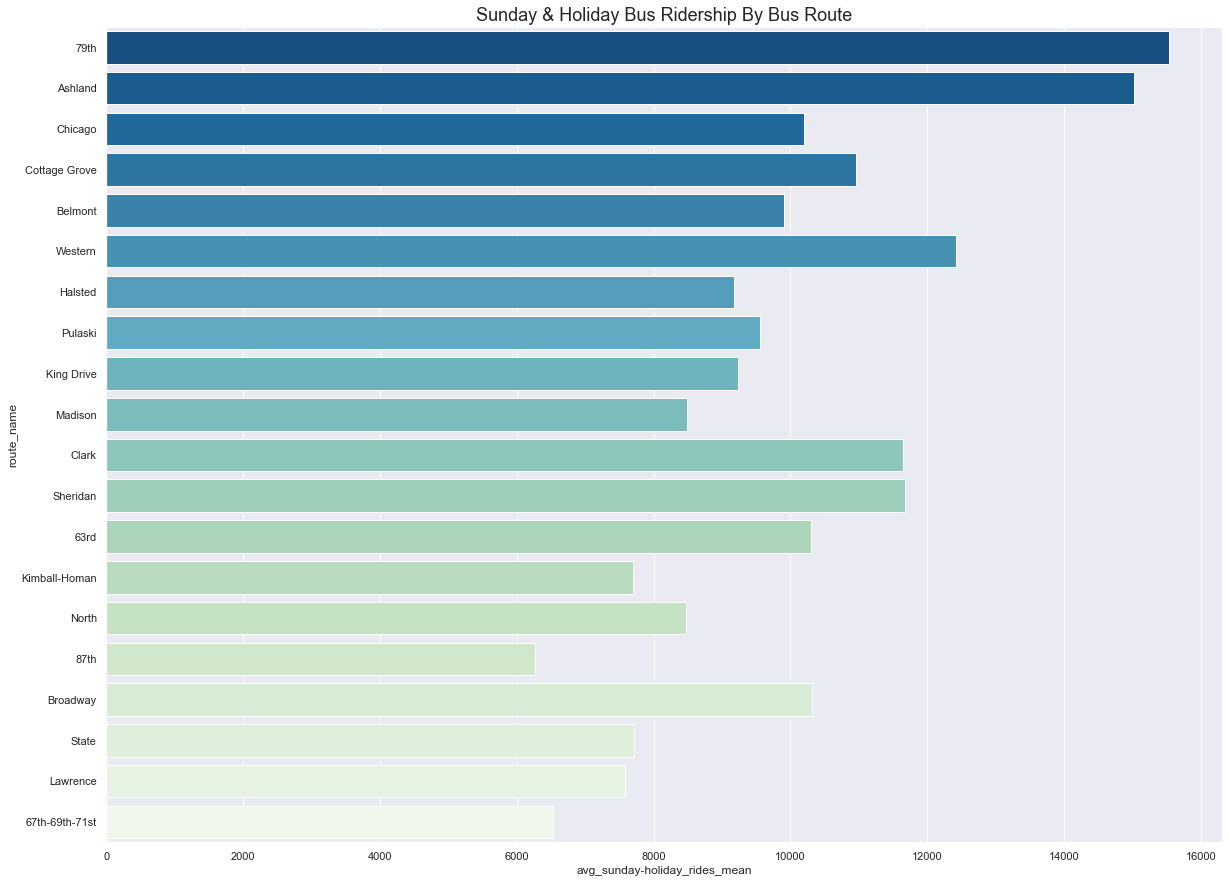

In [140]:
plt.figure(figsize=(20,15))
plt.title('Sunday & Holiday Bus Ridership By Bus Route',fontsize=18)
sns.barplot(x=top_20_bus['avg_sunday-holiday_rides_mean'], y=top_20_bus.index, palette='GnBu_r');
plt.savefig('sun_holiday_ridership_bus.png')

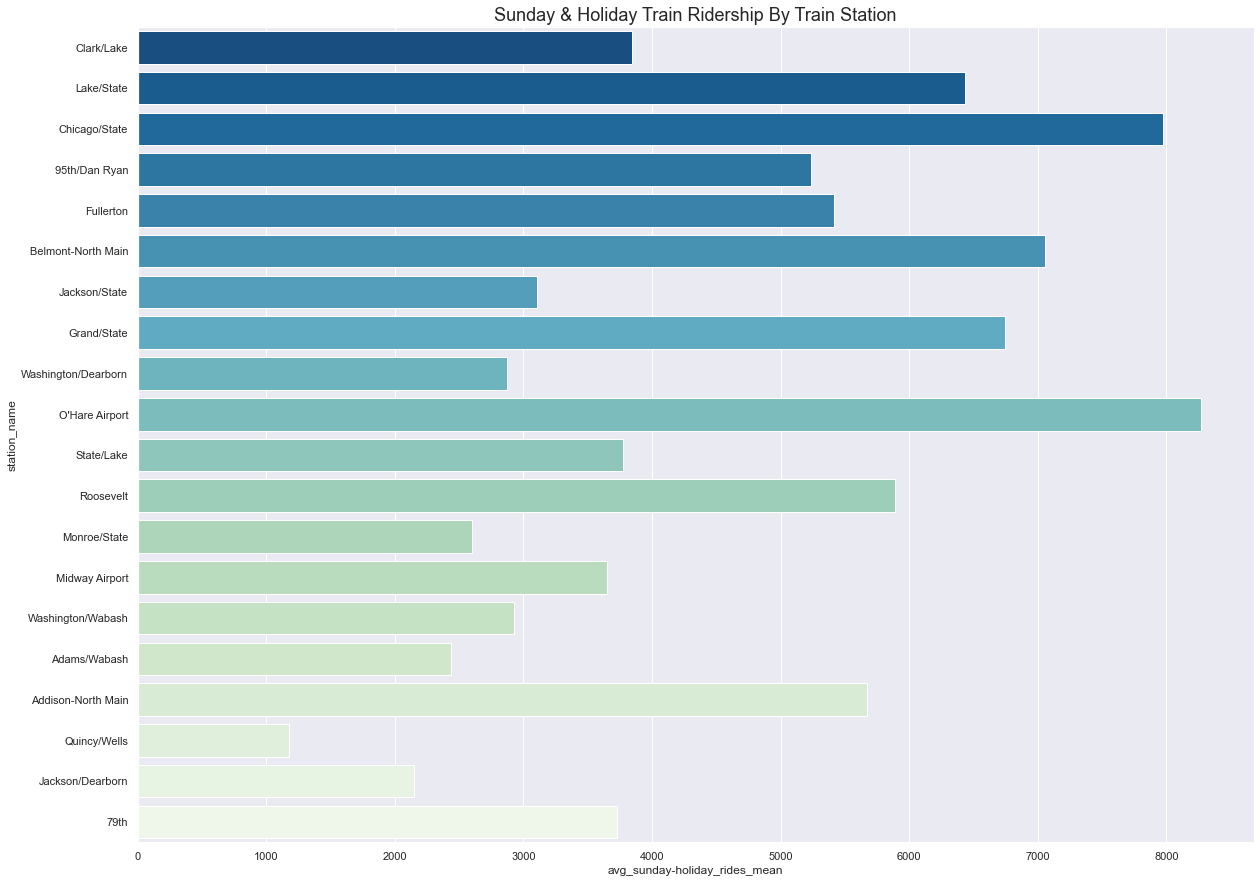

In [141]:
plt.figure(figsize=(20,15))
plt.title('Sunday & Holiday Train Ridership By Train Station',fontsize=18)
sns.barplot(x=top_20_train['avg_sunday-holiday_rides_mean'], y=top_20_train.index, palette='GnBu_r');
plt.savefig('sun_holiday_ridership_train.png')

In [158]:
mean_by_month_bus = bus.groupby('month_beginning')[['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides']].mean()
mean_by_month_bus.columns = mean_by_month_bus.columns.map(''.join)
top_20_month_bus = mean_by_month_bus.sort_values(by=['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides'], ascending=False).head(20)

In [159]:
mean_by_month_train = train.groupby('month_beginning')[['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides']].mean()
mean_by_month_train.columns = mean_by_month_train.columns.map(''.join)
top_20_month_train = mean_by_month_train.sort_values(by=['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides'], ascending=False).head(20)

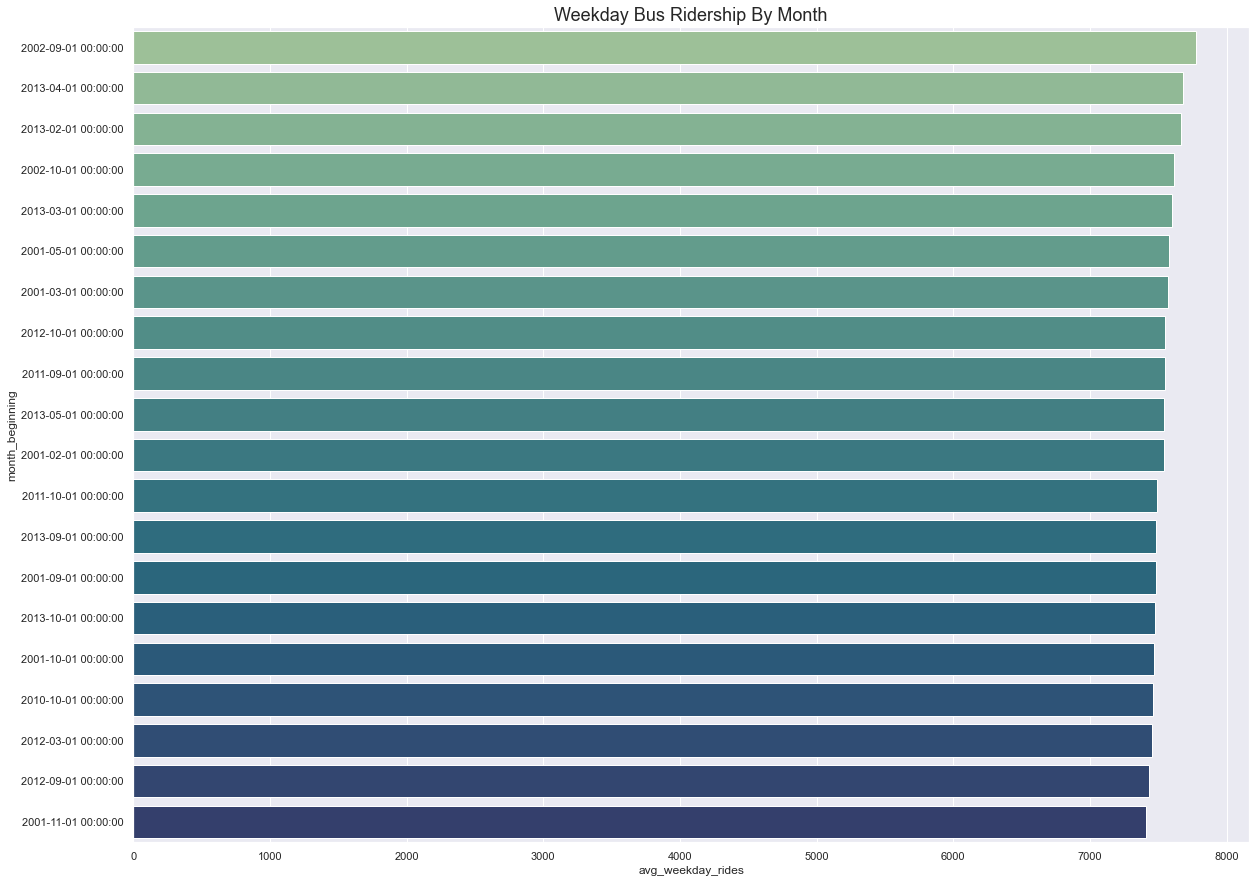

In [160]:
plt.figure(figsize=(20,15))
plt.title('Weekday Bus Ridership By Month',fontsize=18)
sns.barplot(x=top_20_month_bus['avg_weekday_rides'], y=top_20_month_bus.index, palette='crest');
plt.savefig('bymonth_weekday_ridership_bus.png')

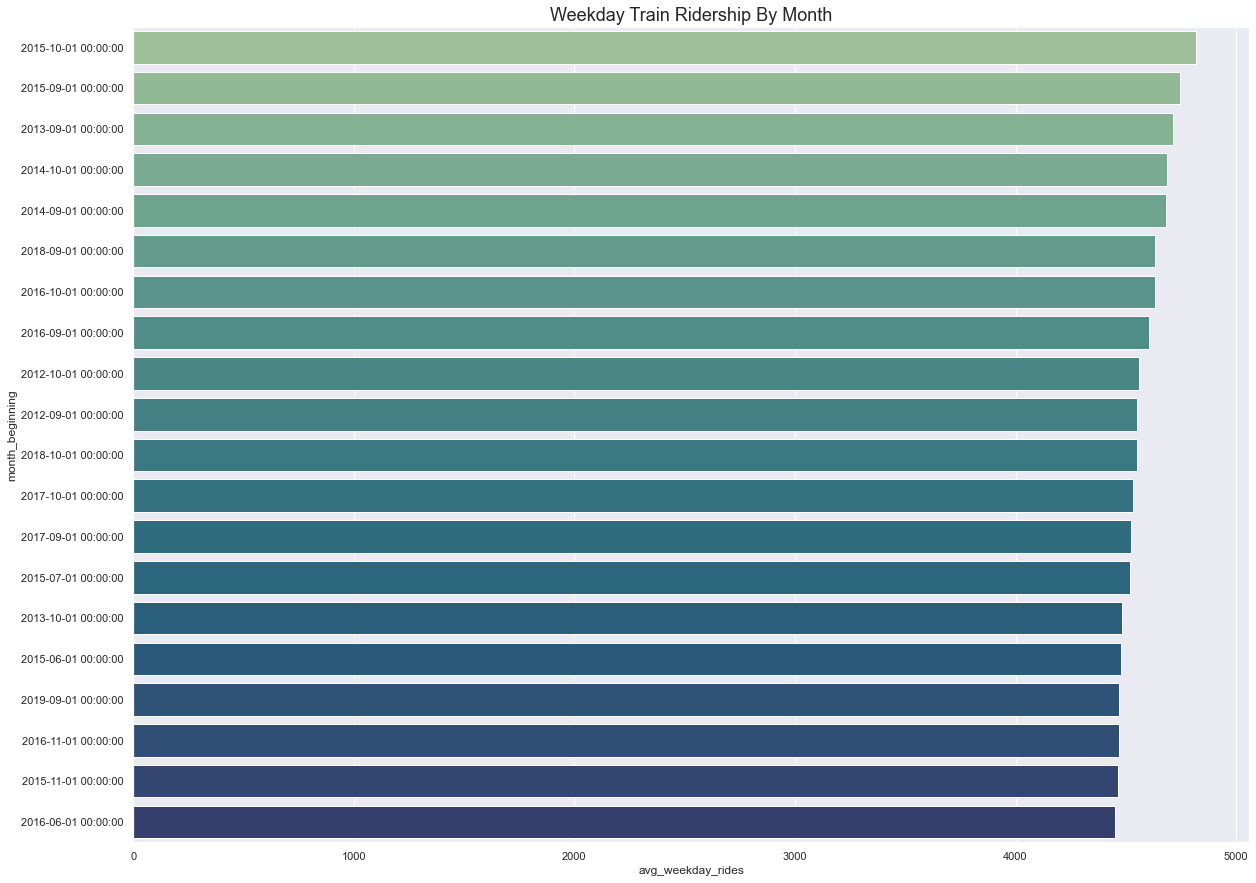

In [161]:
plt.figure(figsize=(20,15))
plt.title('Weekday Train Ridership By Month',fontsize=18)
sns.barplot(x=top_20_month_train['avg_weekday_rides'], y=top_20_month_train.index, palette='crest');
plt.savefig('bymonth_weekday_ridership_train.png')